
- Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
- Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
- Разделите данные на выборку для обучения и тестирования
- Постройте модель LDA
- Визуализируйте предсказания для тестовой выборки и центры классов
- Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
- Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию


In [2]:
#Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
from sklearn.datasets import load_iris

In [8]:
import pandas as pd

In [80]:
iris = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
print(load_iris().DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [81]:
#Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

iris.drop(['petal length (cm)', 'petal width (cm)'], axis=1, inplace=True)
iris['variety'] = load_iris().target
iris

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [31]:
#Разделите данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
iris_train, iris_test = train_test_split(iris, test_size=0.2)

In [32]:
iris_train

,sepal length (cm),sepal width (cm),variety
70,5.9,3.2,1
48,5.3,3.7,0
71,6.1,2.8,1
28,5.2,3.4,0
65,6.7,3.1,1
...,...,...,...
82,5.8,2.7,1
11,4.8,3.4,0
132,6.4,2.8,2
47,4.6,3.2,0


In [33]:
iris_test

,sepal length (cm),sepal width (cm),variety
81,5.5,2.4,1
18,5.7,3.8,0
37,4.9,3.6,0
141,6.9,3.1,2
7,5.0,3.4,0
105,7.6,3.0,2
125,7.2,3.2,2
146,6.3,2.5,2
30,4.8,3.1,0
5,5.4,3.9,0


In [ ]:
# Постройте модель LDA
# Визуализируйте предсказания для тестовой выборки и центры классов
# Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
# Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [36]:
#Постройте модель LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np


In [38]:
y_train, y_test = iris_train['variety'], iris_test['variety']
del iris_train['variety']
del iris_test['variety']

In [45]:
lda = LinearDiscriminantAnalysis()
lda.fit(iris_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [46]:
lda.predict(iris_test)

array([1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2,
       2, 2, 0, 2, 2, 1, 0, 0])

In [47]:
result = pd.DataFrame([y_test.values, lda.predict(iris_test)]).T
result

,0,1
0,1,1
1,0,0
2,0,0
3,2,2
4,0,0
5,2,2
6,2,2
7,2,2
8,0,0
9,0,0


In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test, lda.predict(iris_test))
#Не самая высокая точность

0.8

In [51]:
import matplotlib.pyplot as plt
from matplotlib import colors

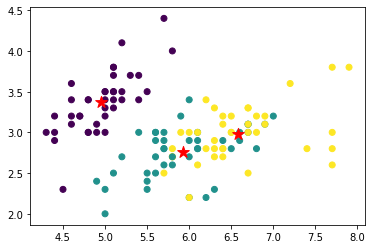

In [60]:
#Визуализируйте предсказания для тестовой выборки и центры классов
plt.scatter(iris_train['sepal length (cm)'], iris_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

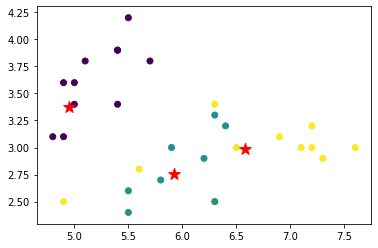

In [61]:
plt.scatter(iris_test['sepal length (cm)'], iris_test['sepal width (cm)'], c=y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

In [62]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

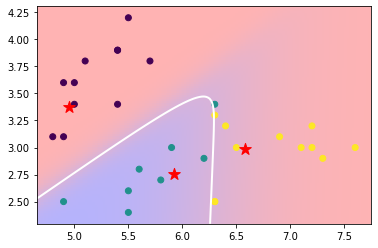

In [68]:
plt.scatter(iris_test['sepal length (cm)'], iris_test['sepal width (cm)'], c=lda.predict(iris_test))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [82]:
# Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
iris = iris[['sepal length (cm)','sepal width (cm)']]
iris.columns = ['sepal_length','sepal_width']
iris.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [83]:
# Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию
from sklearn.preprocessing import StandardScaler

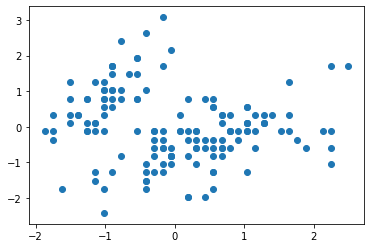

In [84]:
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris)
plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1])

In [86]:
from sklearn.cluster import KMeans

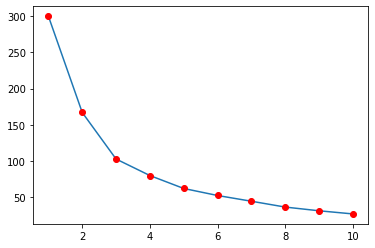

In [90]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(iris_scaled)
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
#берем 4 кластера

In [91]:
from sklearn.cluster import AgglomerativeClustering

In [98]:
aglo = AgglomerativeClustering(n_clusters=4)
clusters = aglo.fit_predict(iris_scaled)
clusters

array([1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       3, 1, 3, 1, 3, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

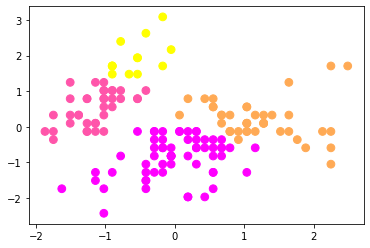

In [102]:
plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1],cmap='spring', c=clusters, s=60)